# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Faaris Muda Dwi Nugraha
- **Email:** faarismudadwinugraha@gmail.com / faarismudawork@gmail.com
- **ID Dicoding:** faarismuda

## Menentukan Pertanyaan Bisnis

**1. "Bagaimana performa rata-rata waktu pengiriman di tiap kota pada tahun 2017, dan apakah ada kota dengan waktu pengiriman lebih dari 10 hari yang dapat memperburuk kepuasan pelanggan?"**

- **Specific**: Fokus pada analisis waktu pengiriman di tiap kota pada tahun 2017.
- **Measurable**: Mengukur rata-rata waktu pengiriman dan identifikasi kota dengan waktu pengiriman lebih dari 10 hari.
- **Action-oriented**: Dapat digunakan untuk mengidentifikasi area yang memerlukan perbaikan dalam hal logistik dan pengiriman.
- **Relevant**: Mengoptimalkan waktu pengiriman untuk meningkatkan pengalaman pelanggan dan kepuasan.
- **Time-bound**: Membatasi analisis pada tahun 2017.

**Teknik Analisis Lanjutan**:
- **Geospatial Analysis**: Menganalisis lokasi dan waktu pengiriman menggunakan data dari `orders_dataset.csv` dan `geolocation_dataset.csv`.
    - Membuat **heatmap** untuk menunjukkan waktu pengiriman di setiap kota.
    - Menghitung **rata-rata waktu pengiriman** per kota dan mengidentifikasi **outlier**.


**2. "Apa hubungan antara frekuensi pembelian pelanggan dan total pengeluaran mereka di tahun 2017, dan bagaimana pola ini memengaruhi segmentasi pelanggan yang paling menguntungkan?"**

- **Specific**: Fokus pada analisis frekuensi pembelian dan total pengeluaran pelanggan di tahun 2017.
- **Measurable**: Menghitung frekuensi pembelian dan total pengeluaran pelanggan.
- **Action-oriented**: Membantu dalam membuat strategi pemasaran yang ditujukan untuk segmen pelanggan yang menguntungkan.
- **Relevant**: Penting untuk strategi retensi pelanggan dan peningkatan pendapatan.
- **Time-bound**: Fokus pada data tahun 2017.

**Teknik Analisis Lanjutan**:
- **RFM Analysis**: Mengukur **recency**, **frequency**, dan **monetary** untuk memahami segmentasi pelanggan berdasarkan perilaku pembelian.
    - Menganalisis dataset untuk menghitung **frekuensi** dan **total pengeluaran**.
    - Segmentasi pelanggan berdasarkan frekuensi pembelian dan total pengeluaran untuk mengidentifikasi kelompok yang paling menguntungkan.


**3. "Produk kategori mana yang memberikan kontribusi terbesar terhadap pendapatan perusahaan selama Q1 2017, dan apakah ada kategori dengan tingkat pengembalian produk (return rate) yang lebih tinggi?"**

- **Specific**: Fokus pada kontribusi pendapatan berdasarkan kategori produk selama Q1 2017.
- **Measurable**: Menghitung kontribusi pendapatan dari tiap kategori produk dan mengukur tingkat pengembalian produk.
- **Action-oriented**: Menyediakan informasi untuk perbaikan manajemen inventaris dan pengelolaan kategori produk.
- **Relevant**: Membantu dalam memprioritaskan kategori produk untuk strategi pemasaran dan pengelolaan produk.
- **Time-bound**: Fokus pada periode Q1 2017.

**Teknik Analisis Lanjutan**:
- **Clustering**: Mengelompokkan produk berdasarkan kategori dan kontribusi pendapatan untuk melihat pola kategori yang lebih menguntungkan.
    - Menganalisis data dataset untuk menghitung kontribusi pendapatan berdasarkan kategori produk.
    - Mengukur **tingkat pengembalian produk** dan mengidentifikasi kategori dengan **return rate** tinggi.

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Baca data dari file CSV
customers = pd.read_csv("https://raw.githubusercontent.com/faarismuda/E-commerce-Analysis/main/Dataset/customers_dataset.csv")
geolocation = pd.read_csv("https://raw.githubusercontent.com/faarismuda/E-commerce-Analysis/main/Dataset/geolocation_dataset.csv")
order_items = pd.read_csv("https://raw.githubusercontent.com/faarismuda/E-commerce-Analysis/main/Dataset/order_items_dataset.csv")
order_payments = pd.read_csv("https://raw.githubusercontent.com/faarismuda/E-commerce-Analysis/main/Dataset/order_payments_dataset.csv")
order_reviews = pd.read_csv("https://raw.githubusercontent.com/faarismuda/E-commerce-Analysis/main/Dataset/order_reviews_dataset.csv")
orders = pd.read_csv("https://raw.githubusercontent.com/faarismuda/E-commerce-Analysis/main/Dataset/orders_dataset.csv", parse_dates=['order_purchase_timestamp', 'order_delivered_customer_date'])
product_category_name_translation = pd.read_csv("https://raw.githubusercontent.com/faarismuda/E-commerce-Analysis/main/Dataset/product_category_name_translation.csv")
products = pd.read_csv("https://raw.githubusercontent.com/faarismuda/E-commerce-Analysis/main/Dataset/products_dataset.csv")
sellers = pd.read_csv("https://raw.githubusercontent.com/faarismuda/E-commerce-Analysis/main/Dataset/sellers_dataset.csv")

In [5]:
# Filter orders for the year 2017
orders['order_year'] = orders['order_purchase_timestamp'].dt.year
orders_2017 = orders[orders['order_year'] == 2017]

# Calculate delivery duration
orders_2017['delivery_duration'] = (orders_2017['order_delivered_customer_date'] - orders_2017['order_purchase_timestamp']).dt.days

# Merge orders with customers to get city information
orders_customers = pd.merge(orders_2017, customers, on='customer_id', how='left')

# Merge with reviews to add review scores
orders_customers_reviews = pd.merge(orders_customers, order_reviews[['order_id', 'review_score']], on='order_id', how='left')

# Optional: Merge with geolocation to get latitude and longitude
geolocation_unique = geolocation.drop_duplicates(subset=['geolocation_zip_code_prefix', 'geolocation_city'])
merged_data = pd.merge(orders_customers_reviews, geolocation_unique,
                       left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix',
                       how='left')

# Final dataset
final_data = merged_data[['order_id', 'customer_city', 'delivery_duration', 'review_score',
                          'geolocation_lat', 'geolocation_lng']]

# Save the final dataset to a CSV (optional)
final_data.to_csv('merged_data_2017.csv', index=False)

print("Data merged successfully. Preview:")
print(final_data.head())

<ipython-input-5-943b91537dd7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_2017['delivery_duration'] = (orders_2017['order_delivered_customer_date'] - orders_2017['order_purchase_timestamp']).dt.days


Data merged successfully. Preview:
                           order_id            customer_city  \
0  e481f51cbdc54678b7cc49136f2d6af7                sao paulo   
1  e481f51cbdc54678b7cc49136f2d6af7                sao paulo   
2  949d5b44dbf5de918fe9c16f97b45f8a  sao goncalo do amarante   
3  949d5b44dbf5de918fe9c16f97b45f8a  sao goncalo do amarante   
4  a4591c265e18cb1dcee52889e2d8acc3             congonhinhas   

   delivery_duration  review_score  geolocation_lat  geolocation_lng  
0                8.0           4.0       -23.574809       -46.587471  
1                8.0           4.0       -23.575377       -46.587410  
2               13.0           5.0        -5.767733       -35.275467  
3               13.0           5.0        -5.776335       -35.255697  
4               16.0           4.0       -23.548581       -50.550660  


**Insight:**
- xxx
- xxx

### Assessing Data

**Insight:**
- xxx
- xxx

### Cleaning Data

**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...

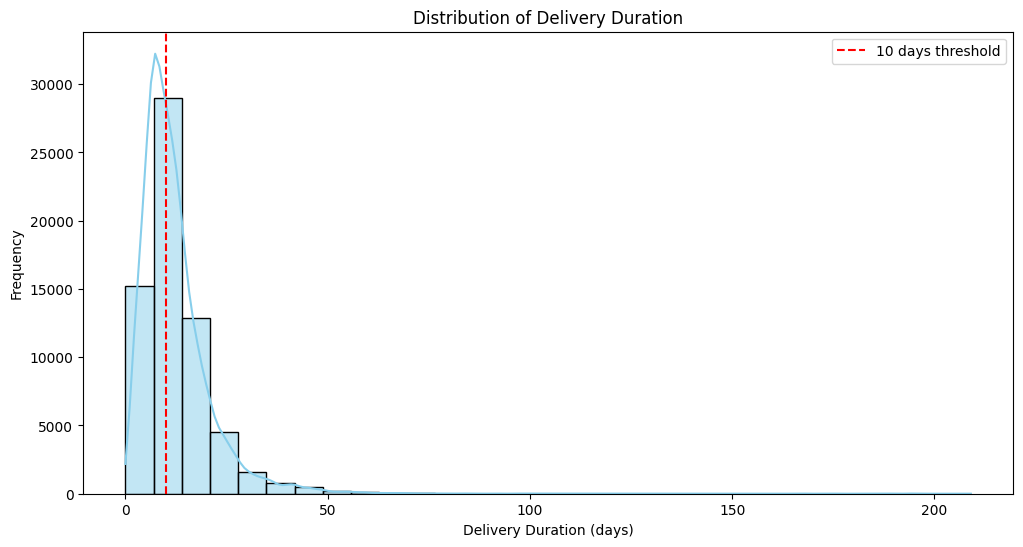

<ipython-input-6-3b7f3e782e61>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_delivery_stats.sort_values('avg_delivery_duration', ascending=False).head(20),


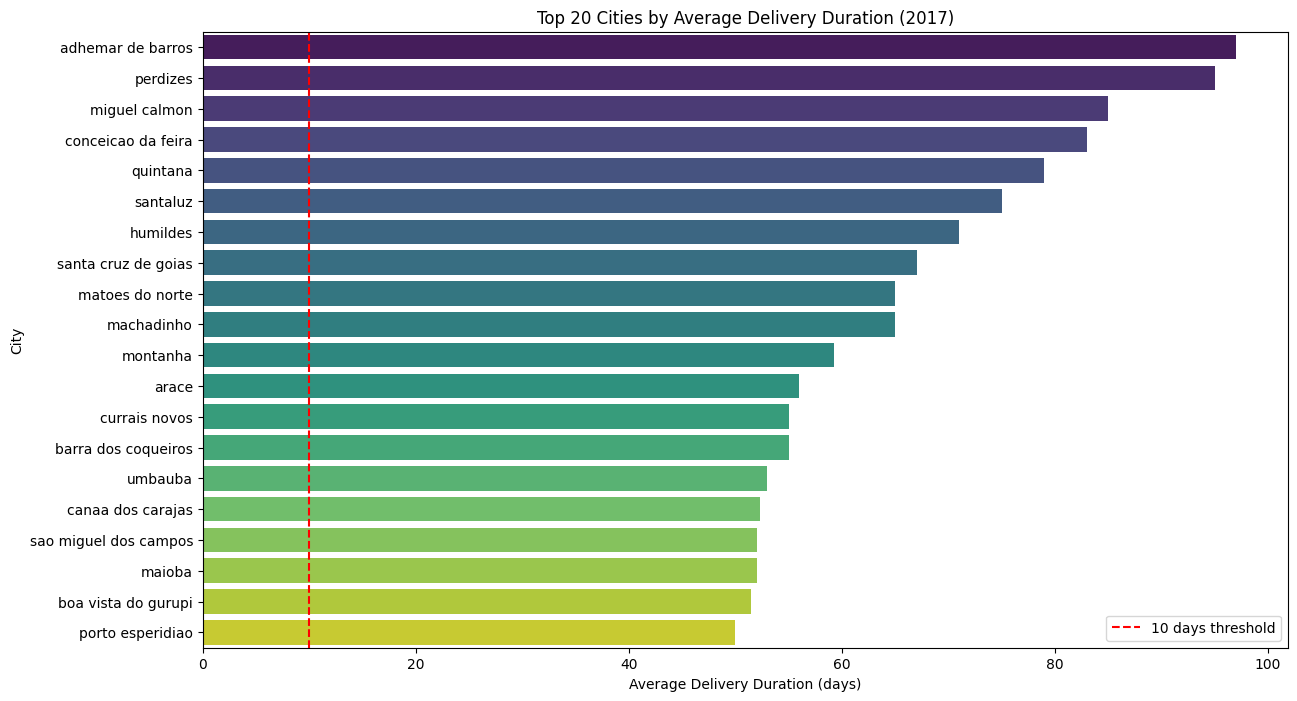

Cities with average delivery time > 10 days:
      customer_city  avg_delivery_duration  num_orders
2        abaetetuba              28.000000           4
3           abaiara              25.000000           1
4             abare              15.000000           2
5            abatia              18.500000           4
6     abdon batista              14.000000           1
...             ...                    ...         ...
3242       xinguara              20.250000           4
3243    xique-xique              15.000000           1
3244       zacarias              14.500000           2
3245        ze doca              30.666667           6
3246         zortea              12.000000           2

[2557 rows x 3 columns]

Correlation between delivery duration and review score:
                   delivery_duration  review_score
delivery_duration           1.000000     -0.318667
review_score               -0.318667      1.000000


In [6]:
# Load the merged dataset
data = pd.read_csv('merged_data_2017.csv')

# Drop rows with missing delivery duration or city data
data_cleaned = data.dropna(subset=['delivery_duration', 'customer_city'])

# Group by city and calculate average delivery duration
city_delivery_stats = data_cleaned.groupby('customer_city')['delivery_duration'].agg(['mean', 'count']).reset_index()
city_delivery_stats.rename(columns={'mean': 'avg_delivery_duration', 'count': 'num_orders'}, inplace=True)

# Identify cities with average delivery time > 10 days
long_delivery_cities = city_delivery_stats[city_delivery_stats['avg_delivery_duration'] > 10]

# Merge back to get review scores for those cities
long_delivery_data = pd.merge(long_delivery_cities, data_cleaned, on='customer_city', how='left')

# Correlation analysis: Delivery time vs Review score
correlation = long_delivery_data[['delivery_duration', 'review_score']].corr()

# Visualization: Distribution of delivery duration
plt.figure(figsize=(12, 6))
sns.histplot(data_cleaned['delivery_duration'], bins=30, kde=True, color='skyblue')
plt.axvline(10, color='red', linestyle='--', label='10 days threshold')
plt.title('Distribution of Delivery Duration')
plt.xlabel('Delivery Duration (days)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Visualization: Average delivery time per city
plt.figure(figsize=(14, 8))
sns.barplot(data=city_delivery_stats.sort_values('avg_delivery_duration', ascending=False).head(20),
            x='avg_delivery_duration', y='customer_city', palette='viridis')
plt.axvline(10, color='red', linestyle='--', label='10 days threshold')
plt.title('Top 20 Cities by Average Delivery Duration (2017)')
plt.xlabel('Average Delivery Duration (days)')
plt.ylabel('City')
plt.legend()
plt.show()

# Print summary of long-delivery cities
print("Cities with average delivery time > 10 days:")
print(long_delivery_cities)

print("\nCorrelation between delivery duration and review score:")
print(correlation)


In [22]:
# Hitung rata-rata waktu pengiriman per kota
city_delivery_time = orders_geo_2017.groupby('customer_city')['delivery_time_days'].mean().reset_index()

# Ubah nama kolom agar lebih jelas
city_delivery_time.columns = ['customer_city', 'avg_delivery_time_days']

# Tampilkan 10 kota dengan rata-rata waktu pengiriman tertinggi
city_delivery_time_sorted = city_delivery_time.sort_values(by='avg_delivery_time_days', ascending=False)
print("Top 10 cities with highest average delivery time:")
print(city_delivery_time_sorted.head(10))


Top 10 cities with highest average delivery time:
            customer_city  avg_delivery_time_days
18      adhemar de barros                    97.0
2228             perdizes                    95.0
1825        miguel calmon                    85.0
787    conceicao da feira                    83.0
2424             quintana                    79.0
2659             santaluz                    75.0
1228             humildes                    71.0
2595  santa cruz de goias                    67.0
1709           machadinho                    65.0
1801      matoes do norte                    65.0


In [23]:
# Filter kota dengan waktu pengiriman rata-rata lebih dari 10 hari
cities_above_10_days = city_delivery_time[city_delivery_time['avg_delivery_time_days'] > 10]

print("Cities with average delivery time > 10 days:")
print(cities_above_10_days)


Cities with average delivery time > 10 days:
      customer_city  avg_delivery_time_days
2        abaetetuba               28.000000
3           abaiara               25.000000
4             abare               15.000000
5            abatia               18.500000
6     abdon batista               14.000000
...             ...                     ...
3242       xinguara               20.250000
3243    xique-xique               15.000000
3244       zacarias               14.500000
3245        ze doca               30.666667
3246         zortea               12.000000

[2557 rows x 2 columns]


**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1:

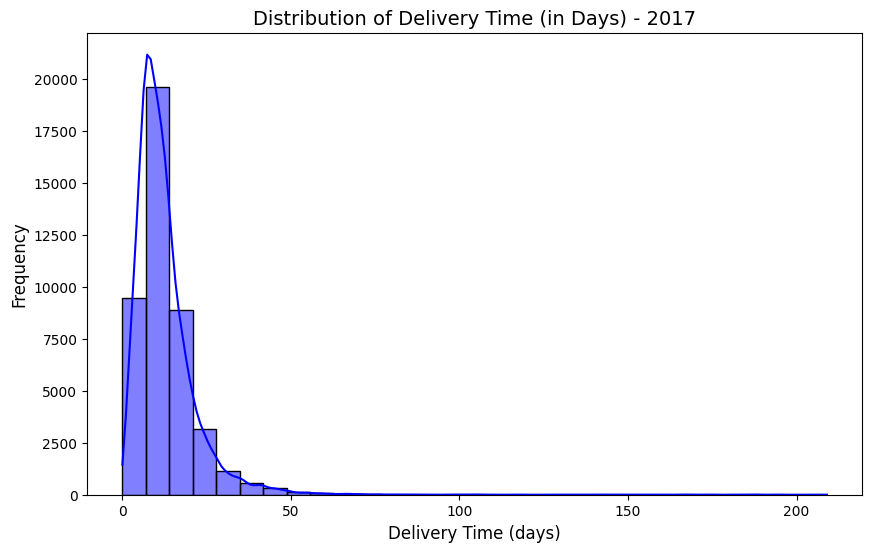

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribusi waktu pengiriman
plt.figure(figsize=(10, 6))
sns.histplot(orders_geo_2017['delivery_time_days'], bins=30, kde=True, color='blue')
plt.title("Distribution of Delivery Time (in Days) - 2017", fontsize=14)
plt.xlabel("Delivery Time (days)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


<ipython-input-25-43e3b13971fc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities, x='customer_city', y='avg_delivery_time_days', palette='viridis')


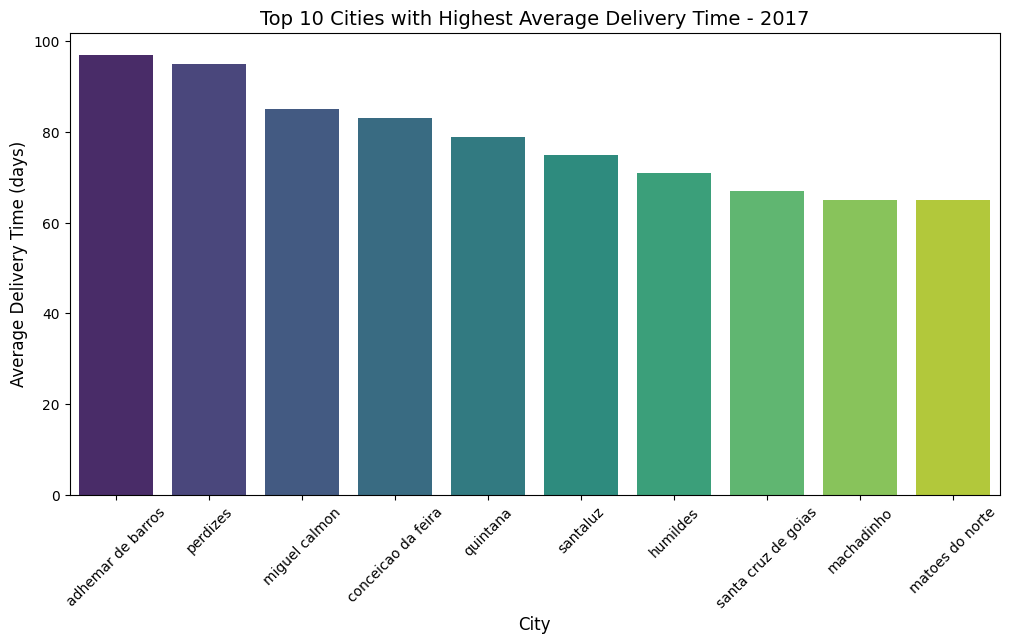

In [25]:
# Visualisasi 10 kota dengan waktu pengiriman tertinggi
top_cities = city_delivery_time_sorted.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_cities, x='customer_city', y='avg_delivery_time_days', palette='viridis')
plt.title("Top 10 Cities with Highest Average Delivery Time - 2017", fontsize=14)
plt.xlabel("City", fontsize=12)
plt.ylabel("Average Delivery Time (days)", fontsize=12)
plt.xticks(rotation=45)
plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 43.9 MB/s eta 0:00:00


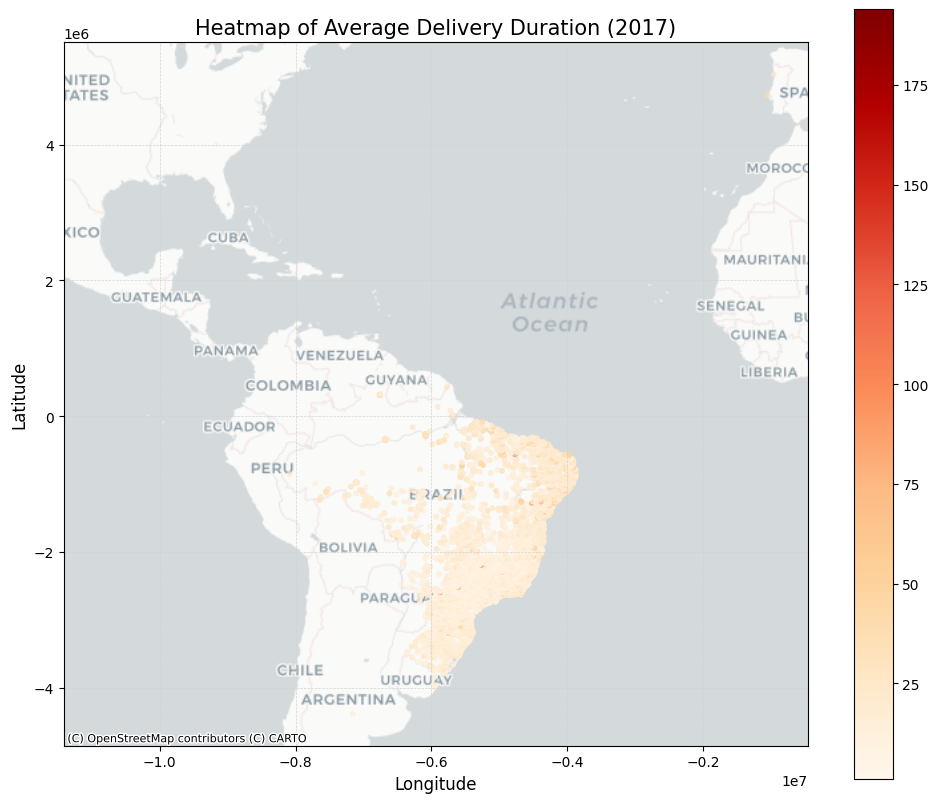

In [10]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
!pip install contextily
import contextily as ctx

# Load cleaned dataset
data = pd.read_csv('merged_data_2017.csv')

# Drop rows with missing geolocation or delivery duration
data_cleaned = data.dropna(subset=['delivery_duration', 'geolocation_lat', 'geolocation_lng'])

# Group by geolocation (latitude & longitude) and calculate average delivery duration
geo_delivery_stats = data_cleaned.groupby(['geolocation_lat', 'geolocation_lng'])['delivery_duration'].mean().reset_index()
geo_delivery_stats.rename(columns={'delivery_duration': 'avg_delivery_duration'}, inplace=True)

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(geo_delivery_stats,
                       geometry=gpd.points_from_xy(geo_delivery_stats['geolocation_lng'], geo_delivery_stats['geolocation_lat']),
                       crs="EPSG:4326")

# Reproject to Web Mercator for compatibility with basemap
gdf = gdf.to_crs(epsg=3857)

# Plot the heatmap
fig, ax = plt.subplots(figsize=(12, 10))
gdf.plot(column='avg_delivery_duration', cmap='OrRd', markersize=10, alpha=0.6, legend=True, ax=ax)

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Customizations
plt.title('Heatmap of Average Delivery Duration (2017)', fontsize=15)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.show()


### Pertanyaan 2:

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2